In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
import os
os.getcwd()
os.chdir('..')


In [3]:
os.getcwd()

'C:\\Users\\Prabal Kuinkel\\Desktop\\Data Analyst\\100-Days-of-ML'

In [4]:
df = pd.read_csv('Data-sets\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#Converting the Month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
df.head(3)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [9]:
df.index

RangeIndex(start=0, stop=144, step=1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='#Passengers'>

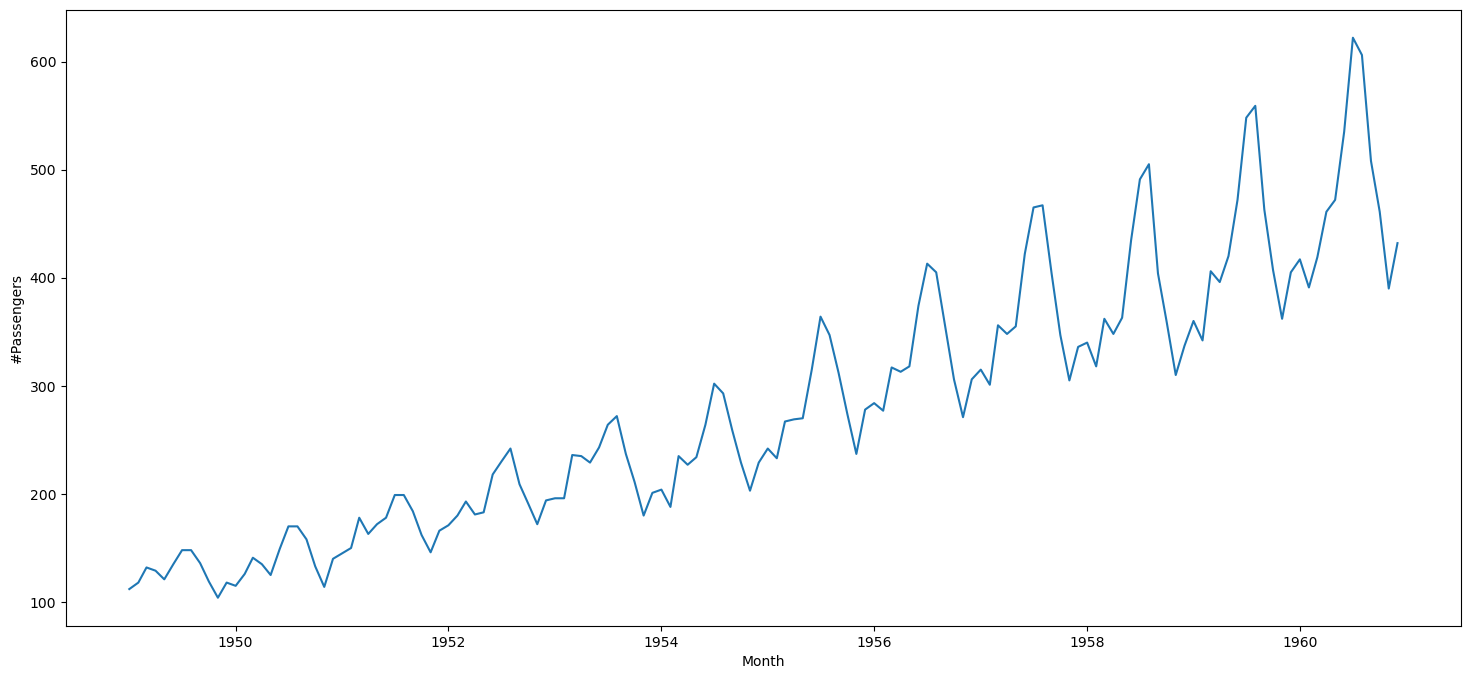

In [10]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='Month',y='#Passengers')

### In the above line plot we can observe that there is Trend(Increasing) component and also the seasonality component (since the patterns / spikes are visible after certain fixed interval of time)

# Now we check if the Time-Series is stationary or not

## Technique-1 Using self observation/Summary Statistics ---->>> This technique may be misleading to human eyes

In this technique we divide the entire data sets into multiple dataframe(2 or more with equal datapoints) and we calculate
the mean, variance of all the dataframe .Then we compare the mean and varaince of all the data frame and see how much are they being deviated .Incase of high deviation we can say that in preliminary check for stationarity that the Time-series data is not stationary  

In [11]:
# we are extracting the values of '#Passenger' Column dividing into 2 equal halves and calculating the mean 
# and varaince of both halves to check if there is high deviation/Fluctaution .

from pandas import read_csv
#series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
X_new = df['#Passengers'].values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1 =X1.mean()
mean2 = X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='#Passengers', ylabel='Count'>

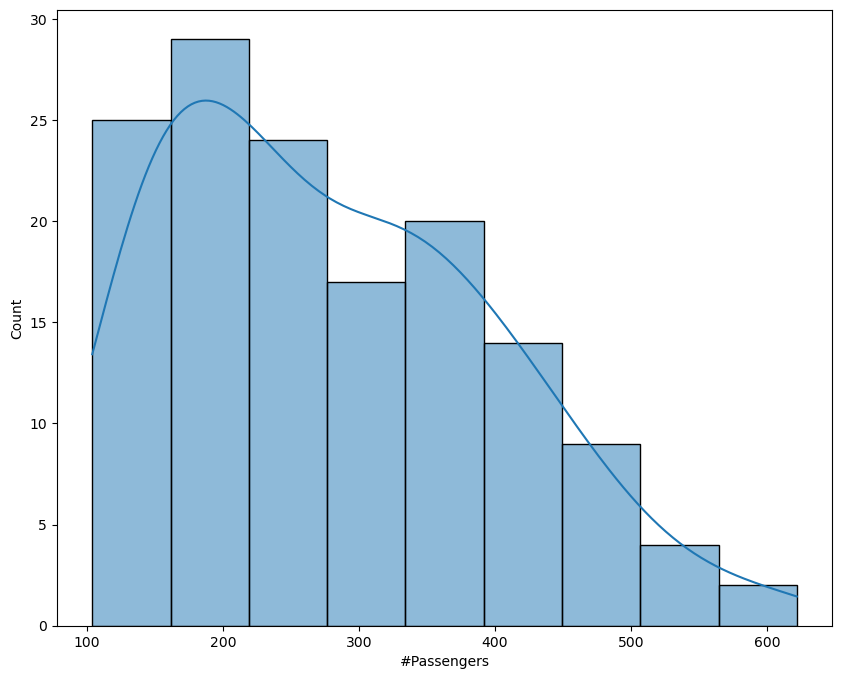

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='#Passengers',kde=True)

1) Values not looking like Gaussian, therefore mean & variance values are less meaningful
2) Since there is high fluctuation in mean and variance so for perliminary test we can say that the data is stationary

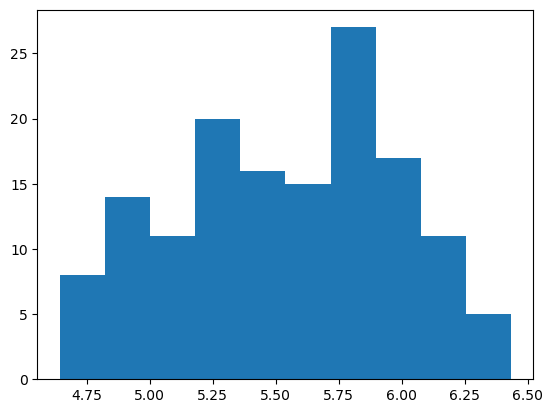

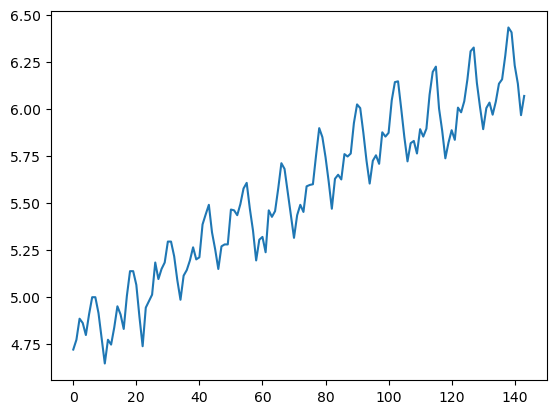

In [13]:
# A log transform can be used to flatten out exponential change back to a linear relationship.
from numpy import log
X_log = log(df['#Passengers'].values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

# Technique-2 STATISTICAL TEST


## Using Angumented Dickey Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC",maxlag=0)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [18]:
df.set_index('Month', inplace=True)  #Set Month(i.e 'time' column) as the Index (Optional but Common for Time Series):

In [19]:
adf_test(df)


Results of Dickey-Fuller Test:
Test Statistic                  -1.748093
p-value                          0.406519
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


### Interpretation:
Null Hypothesis (H₀): The time series is non-stationary (it has a unit root).

Alternative Hypothesis (H₁): The time series is stationary.
### Key Points:
The test statistic (-1.748093) is greater than all the critical values at the 1%, 5%, and 10% significance levels.

The p-value (0.406519) is greater than common significance levels like 0.01, 0.05, and 0.1

### Based on the results(Conclusion)

p-value (0.406519) is much greater than 0.05 (or any typical threshold like 0.01 or 0.1).

Conclusion: Fail to reject the null hypothesis; the time series is likely non-stationary.

The test statistic (-1.748093) is greater than all critical values (-3.476927, -2.881973,  -2.577665).

Conclusion: The test statistic does not provide evidence against the null hypothesis. The time series is not stationary .


# Making the time series stationary using the log transformation

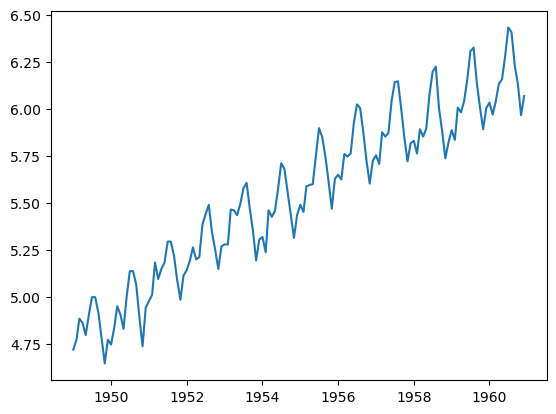

In [25]:
# Applying log transform
df_log = np.log(df)
plt.plot(df_log)

In [27]:
#Dickery fuller test after applying log transform
adf_test(df_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.816050
p-value                          0.372523
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


### After applying the log transformation, the results of the Augmented Dickey-Fuller (ADF) test remain similar to the previous results:

### Interpretation:

The test statistic (-1.816050) is still greater than all the critical values at the 1%, 5%, and 10% significance levels.

The p-value (0.372523) is still greater than the common significance levels (0.01, 0.05, and 0.10).

### Conclusion:
Since the test statistic remains above the critical values and the p-value is still high, we fail to reject the null hypothesis (H₀) again.

This means the series is still non-stationary even after applying a log transformation.

### Next Steps:
Since the log transformation didn't make the data stationary, we might want to try other techniques such as:

Differencing: Subtracting the previous observation from the current observation (e.g., first-order differencing).

Seasonal differencing: If seasonality is present in the data, try applying seasonal differencing.

Detrending: Removing trend components explicitly.



# Smoothing and Differencing (to remove trend and seasonality and make time series stationary)

In [60]:
#Smoothing(Moving Average)
moving_avg = pd.Series(df_log['#Passengers']).rolling(window=12).mean()

Purpose: The goal of smoothing is to remove the trend component from the data. You use a moving average with a window size of 12 (months) to capture the underlying seasonal pattern and smooth out short-term fluctuations.

Rolling window: This method calculates the mean of the data over a window of 12 periods (12 months, in your case). By using this rolling average, you essentially smooth out fluctuations over each 12-month period, which helps remove long-term trends.

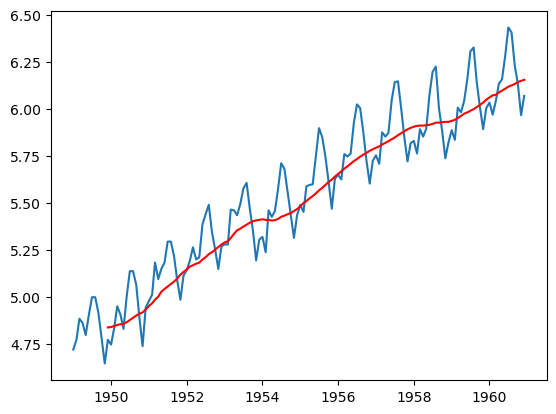

In [61]:
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [54]:
# Differencing the data to remove seasonality:
df_log_moving_avg_diff = df_log['#Passengers'] - moving_avg
df_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

Purpose: After smoothing, you subtract the moving average from the original log-transformed data. This step is called differencing, which helps remove any remaining trend or seasonality in the series.

By differencing, you essentially remove the seasonal effect captured by the moving average, leaving behind only the noise and the irregular component. This should make the series more stationary.

In [64]:
# Dropping NaN values:
df_log_moving_avg_diff.dropna(inplace=True)
df_log_moving_avg_diff.head(5)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

# Is this technique(log transform,Smoothing and Differencing) correct?
Yes, this is a valid technique to make a time series stationary. Here's why:

Log transformation reduces variance and stabilizes the mean, making it easier to detect and model trends.

Smoothing (moving average) helps capture seasonality and remove long-term trends.

Differencing (subtracting the moving average) helps remove remaining seasonality or trends that were not captured by the initial transformation.

In [57]:
#TEST STATIONARITY AGAIN
adf_test(df_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -4.907410
p-value                          0.000034
#Lags Used                       0.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64
